In [67]:
from __future__ import print_function, division

# Get pandas and postgres to work together
import psycopg2 as pg
import pandas.io.sql as pd_sql

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [23]:
# Postgres info to connect

connection_args = {
    'host': '52.15.95.81', # You'll have to update this to your IP
    'user': 'ubuntu',    # username
    'dbname': 'coffee',   # DB that we are connecting to
    'port': 5432         # port we opened on AWS
}

connection = pg.connect(**connection_args)



In [24]:
query = "SELECT * FROM arabica;"

arabica = pd_sql.read_sql(query, connection)

In [25]:
arabica.columns

Index(['import_index', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [69]:
arabica.sample(5)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1024,Arabica,chris finch,Nicaragua,NaN,NaN,NaN,17/009/0057,volcafe specialty coffee,between 700 and 1400 meters,matagalpa,...,Green,3,"July 16th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,700.0,1400.0,1050.0
20,Arabica,essencecoffee,Ethiopia,drima zede,NaN,drima zede,100181006,essence coffee,1700-2000m,gedio,...,NaN,8,"March 24th, 2016",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1700.0,2000.0,1850.0
101,Arabica,simon mahinda,Kenya,NaN,CN 11462 AA,ckcm,NaN,c dorman ltd,-1,NaN,...,Green,7,"May 7th, 2017",Kenya Coffee Traders Association,ccba45b89d859740b749878be8c6d16fbdb96c2e,d752c909a015f3c76224b3c5cc520f8a67afda74,m,1.0,1.0,1.0
1221,Arabica,kona pacific farmers cooperative,United States (Hawaii),kona farms,NaN,NaN,HDOA 210542,NaN,NaN,kona,...,NaN,0,"June 20th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,NaN,NaN,NaN
893,Arabica,alfredo bojalil,Mexico,finca nueva linda,NaN,"la concordia, chiapas",2222,ecomtrading,1400,"la concordia, chiapas",...,Green,2,"April 2nd, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1400.0,1400.0,1400.0


In [70]:
arabica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 43 columns):
Species                  1311 non-null object
Owner                    1304 non-null object
Country.of.Origin        1310 non-null object
Farm.Name                955 non-null object
Lot.Number               270 non-null object
Mill                     1001 non-null object
ICO.Number               1165 non-null object
Company                  1102 non-null object
Altitude                 1088 non-null object
Region                   1254 non-null object
Producer                 1081 non-null object
Number.of.Bags           1311 non-null int64
Bag.Weight               1311 non-null object
In.Country.Partner       1311 non-null object
Harvest.Year             1264 non-null object
Grading.Date             1311 non-null object
Owner.1                  1304 non-null object
Variety                  1110 non-null object
Processing.Method        1159 non-null object
Aroma                 

In [71]:
arabica.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [72]:
arabica.nunique()

Species                    1
Owner                    305
Country.of.Origin         36
Farm.Name                557
Lot.Number               221
Mill                     447
ICO.Number               841
Company                  270
Altitude                 383
Region                   343
Producer                 675
Number.of.Bags           130
Bag.Weight                56
In.Country.Partner        27
Harvest.Year              46
Grading.Date             558
Owner.1                  309
Variety                   29
Processing.Method          5
Aroma                     33
Flavor                    35
Aftertaste                35
Acidity                   31
Body                      31
Balance                   32
Uniformity                10
Clean.Cup                 11
Sweetness                  8
Cupper.Points             42
Total.Cup.Points         178
Moisture                  23
Category.One.Defects      16
Quakers                   11
Color                      4
Category.Two.D

### I'll try to predict country

In [27]:
country_query = """
    WITH country_totals AS (
            SELECT country_of_origin, COUNT(country_of_origin) AS "co_count"
                FROM arabica
                    GROUP BY country_of_origin
                        ORDER BY COUNT(country_of_origin) DESC
        ),
        country_percentage AS (
        SELECT country_of_origin, co_count, (co_count * 100 / SUM(co_count) OVER ()) AS "perc_of_total"
            FROM country_totals
        )
        SELECT country_of_origin, co_count, 
            SUM(perc_of_total) over (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS "cum_perc"
            FROM country_percentage
        
"""

countrycounts = pd_sql.read_sql(country_query, connection)
countrycounts

,country_of_origin,co_count,cum_perc
0,Mexico,236,18.001526
1,Colombia,183,31.960336
2,Guatemala,181,45.766590
3,Brazil,132,55.835240
4,Taiwan,75,61.556064
5,United States (Hawaii),73,67.124333
6,Honduras,53,71.167048
7,Costa Rica,51,75.057208
8,Ethiopia,44,78.413425
9,"Tanzania, United Republic Of",40,81.464531


Ideally I'd like to cover 99% of the data, but with so many countries with limited observations, it makes sense to set the cutoff lower. I tried a 95% cutoff with the top 18 countries, then tried the top 8 and 6 countries. However I found that my models only successfully classified observations from the top 4 countries. In the future I can add more data and extend the model to more countries.

In [ ]:
# Now classifying top 4:
n_top_countries = 4
top_country_list = countrycounts.country_of_origin[0:4]
top_country_list

In [ ]:
country_subset_query = """
    SELECT *
        FROM arabica
            WHERE country_of_origin IN ('Guatemala', 'Brazil', 'Mexico', 'Colombia')
        
"""

arabica_subset = pd_sql.read_sql(country_subset_query, connection)

##### Identify features that are not null, to use in our analysis:

In [28]:
not_null_query = """
WITH country_subset AS (
        SELECT *
            FROM arabica
                WHERE country_of_origin IN ('Guatemala', 'Brazil', 'Mexico', 'Colombia')
                    AND WHERE arabica IS NOT NULL
"""

not_null_df = pd_sql.read_sql(not_null_query, connection)

In [7]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 44 columns):
import_index             228 non-null object
species                  228 non-null object
owner                    228 non-null object
country_of_origin        228 non-null object
farm_name                228 non-null object
lot_number               228 non-null object
mill                     228 non-null object
ico_number               228 non-null object
company                  228 non-null object
altitude                 228 non-null object
region                   228 non-null object
producer                 228 non-null object
number_of_bags           228 non-null int64
bag_weight               228 non-null object
in_country_partner       228 non-null object
harvest_year             228 non-null object
grading_date             228 non-null object
owner_1                  228 non-null object
variety                  228 non-null object
processing_method        228 non-null obj

In [79]:
# limiting columns to model to more understandable scores: the goal of the model is to be 
    # able to predict country of origin based on apparent characteristics, so "cupper points"
    # and similar features are too obscure to be useful. Also, total points is a linear combo of other features.
columns_to_model = ['country_of_origin','aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'sweetness', 'uniformity', 'clean_cup']

In [80]:
to_model_query = """
    WITH not_null_subset AS (
        SELECT *
            FROM arabica
                WHERE country_of_origin IN ('Guatemala', 'Brazil', 'Mexico', 'Colombia')
                    AND arabica IS NOT NULL
        )
        SELECT country_of_origin, aroma, flavor, aftertaste, acidity, body, balance, sweetness, uniformity, clean_cup
            FROM not_null_subset
"""

to_model = pd_sql.read_sql(to_model_query, connection)

In [81]:
to_model.shape

(732, 10)

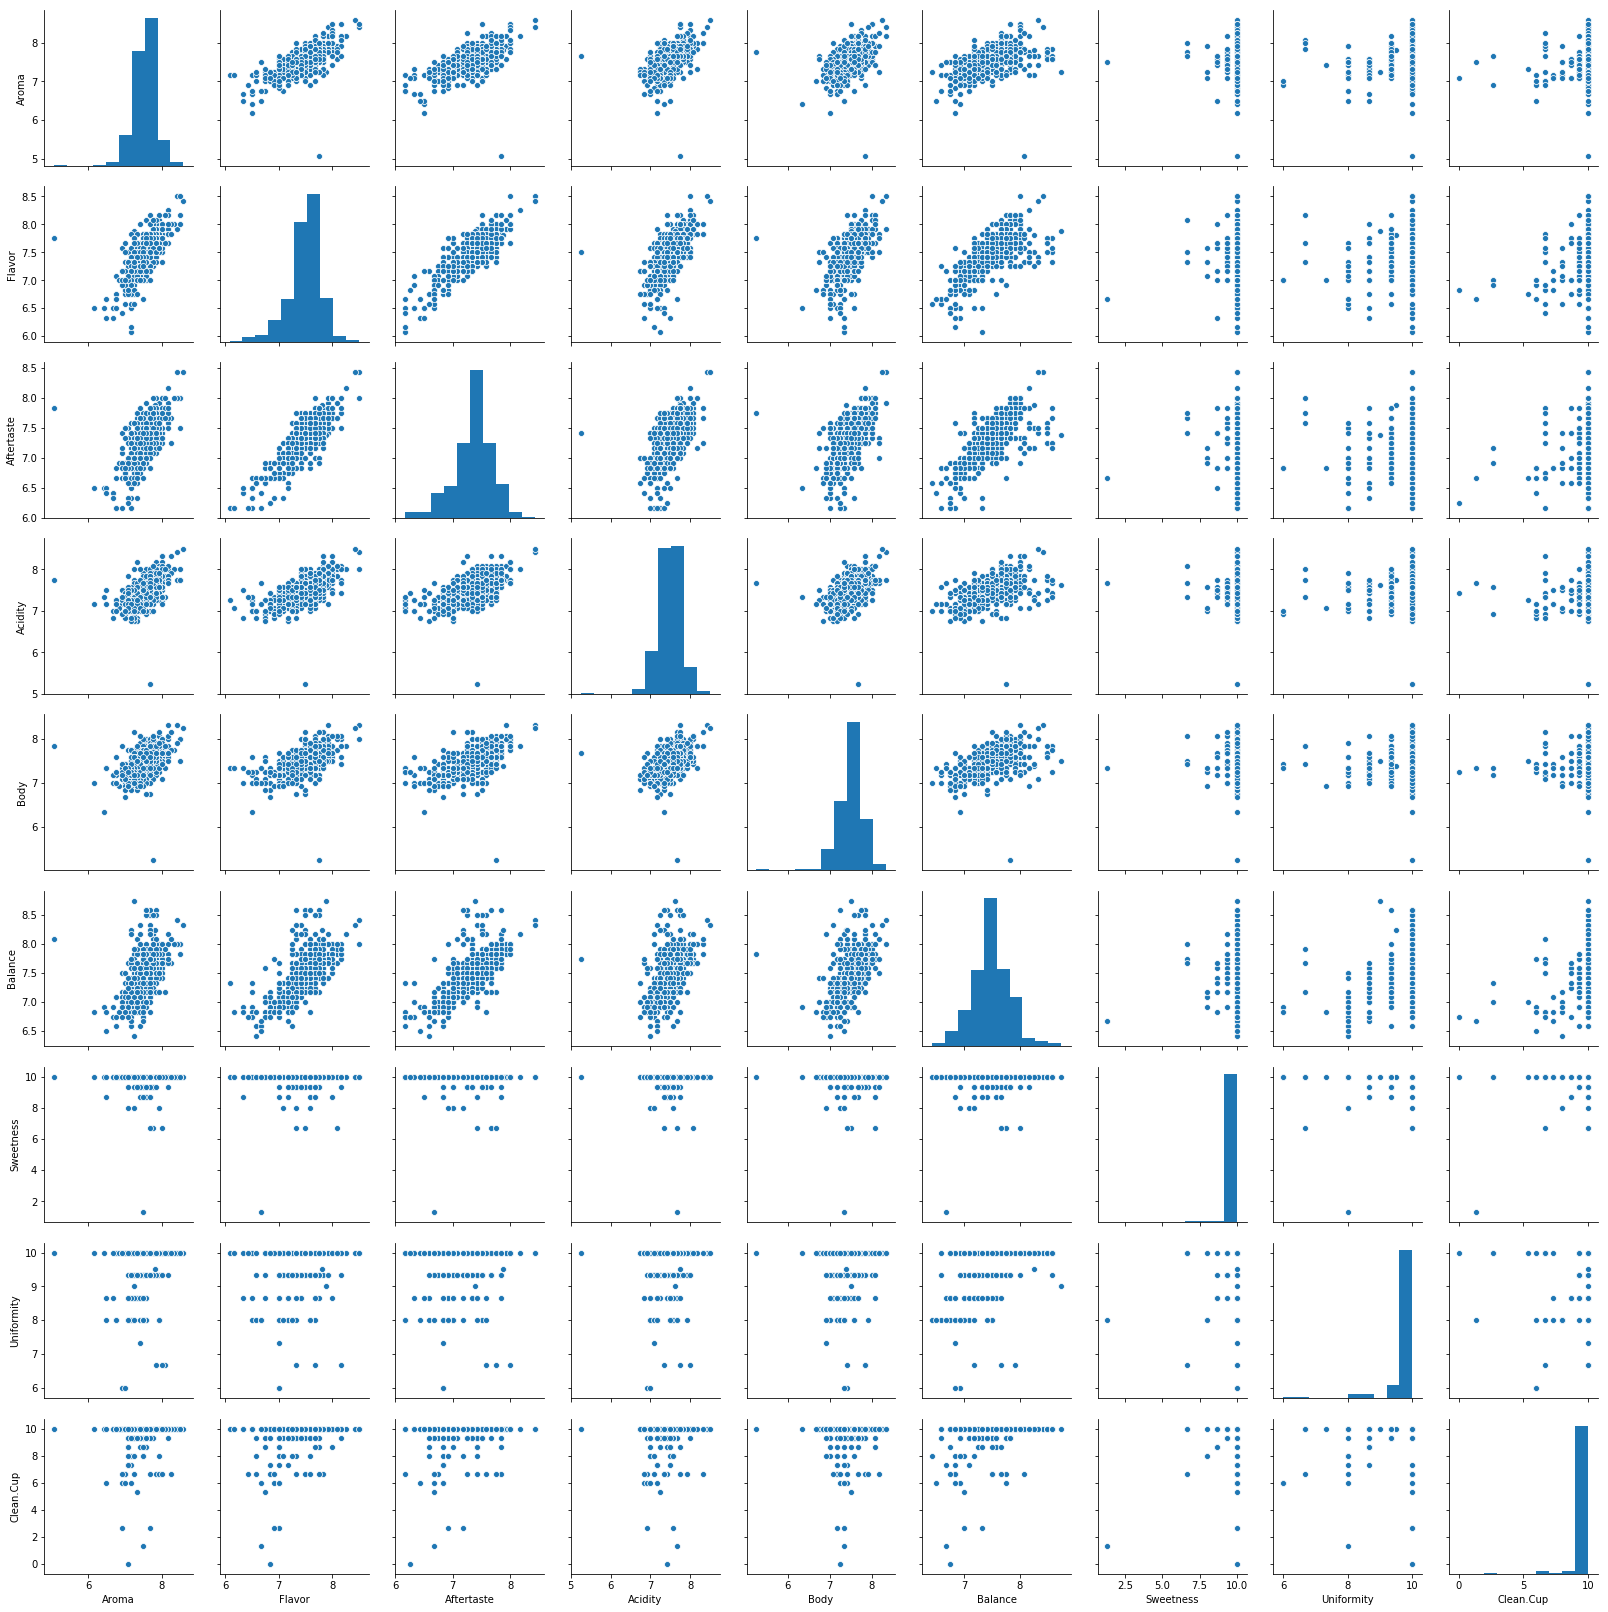

In [82]:
sns.pairplot(to_model)

hmmm... there seems to be an observation with values of 0 throwing things off. I will try to isolate and discard that observation.

In [83]:
to_model[to_model.Aroma==0]

,Country.of.Origin,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Sweetness,Uniformity,Clean.Cup


Aha! I will discard this observation.

In [84]:
to_model = to_model[to_model.Aroma!=0]
to_model.shape

(732, 10)

In [85]:
with open('to_model_top_4_classes.pickle', 'wb') as f:
    pickle.dump(to_model, f)